In [1]:
import pandas as pd
from scipy.stats import skew
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initial Data Analysis

In [2]:
diamonds = pd.read_csv("/Users/viyankamoodley/Desktop/Ass4-data/Part 1 - regression/diamonds.csv")
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [3]:
diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

At first glance, the data looks quite clean - no apparent null values for any of the variables. I will investigate each variable further and will check for any unusual variables that could be a placeholder for null entries.

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   x           53940 non-null  float64
 8   y           53940 non-null  float64
 9   z           53940 non-null  float64
 10  price       53940 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


The diamonds data has 11 columns, 3 of which are categorical input variables that describe the "cut", "color" and "clarity" of a diamond. The remaining 88 variables are numerical, with 2 variables as integer data types and 6 as floating-point data types. The integer data columns are "Unnamed: 0" and the output variable "price". The floating-point columns are input values: "carat", "depth", "table", "x", "y" and "z". In total there are 59,940 rows/entries. 

I will now have a look at the values of the categorical variables and the descriptive statistics of the numerical ones. 

In [5]:
diamonds["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

No unusual values here, no evidence to suggest placeholder null values. The values appear to represent a measure of the quality of a diamond's cut, I'd say it is a an ordinal categorical variable. It is interesting that the higher the quality of a cut, the more popular it is(as seen by the higher value counts). This suggests that ideal cuts are not uncommon. I did research and found that this particular feature of a diamond is one of the few that are not reliant on 'nature', a diamond's cut is generally cleaved/cut by hand or machine, meaning that cut is one of the few features that can be 'controlled'. source: https://brite.co/blog/how-are-diamonds-cut/#:~:text=First%2C%20there%20are%20two%20main,but%20have%20brittle%20parts%20too.

In [6]:
diamonds["clarity"].value_counts()



clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

As before, no unusual values here so no evidence to suggest placeholder null values. I will discuss the meaning of these labels further in my report. The main categories have a ranking that is related to the amount of 'inclusions" (aka, visible imperfections) a diamond has, they are listed in ascending order in terms of clarity: I1 = Included,  SI1 & SI2 = Slight Inclusions, VS1 & VS2 = Very Slight Inclusions, VVS1 & VVS2 = Very Very Slight Inclusions and IF = Internally Flawless. reference: https://novitadiamonds.co.nz/diamond-4cs-diamond-4cs-chart-4-cs-of-diamonds-4cs-diamond?gad_source=1&gclid=Cj0KCQjwu-63BhC9ARIsAMMTLXSfXEJd586Lg3nNIaPHKm5ky5WDFeUinCl4p9zvtBFcs2fSTlFj5DYaAgMKEALw_wcB

It is interesting to me that diamonds with both the lowest and highest clarity ratings, are the least popular. Probably because people generally wouldn't want to buy a diamond with many visible imperfections, but also may not be able to afford the 'flawless' diamonds. There is no apparent pattern here, most people tend to buy slightly included or very slightly included diamonds, probably because while customers value clarity for it's lack of visual imperfections, there are other factors to consider in terms of affordability. By compromising on a clear diamond, you can potentially afford to get a larger diamond a better cut/colour.

In [7]:
diamonds["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

No evidence of null values/unsual variables. I did research to contextualise what this means. A diamond's colour ranges from colourless to yellor/brown and is represented by letters of the alphabet from "D" to "Z". D, E and F are "colourless" diamonds, they are the rarest and are the most expensive. G and H are "nearly colourless", they have a slight tint, but it is not really noticeable to the naked eye, they are the most popular. The lowest classification is I and J, they are the most common and have a "very faint colour", the tint in these diamonds is slightly more noticable than the previous tier. 

Here we can see that the most popular diamonds are "G", "E" and "F" and the least popular are "J", "I" and "D". This makes sense because as discussed previoulsy, colourless diamonds are generally the most sought after, but also the most expensive. G is the most popular and is "nearly colourless" which is a more affordable option that is still visually close to 'colourless'. E and F, follow behind, likely because they are more expensive, but still highly sought after, D has one of the lowest counts, likely because of it's rarity and steep cost.

In [8]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


Interesting. The column "Unnamed: 0" has a min of "1" and a max of "53940", which seems like it's an index column. I will check the length of it's unique values afterward to validate this assumption. 

In [9]:
## checking to see how many unique values there are
#if the result matches the number of rows in the dataset, then i will drop this col in preprocessing
len(diamonds["Unnamed: 0"].unique())

53940

In [10]:
duplicate_rows = diamonds.duplicated()

# print duplicate rows
print(duplicate_rows)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool


In [11]:
duplicate_rows.value_counts()

False    53940
Name: count, dtype: int64

No duplicate rows, data is clean. 

# Initial preprocessing for EDA

In [12]:
# this is just a reduced version of the data before splitting and doing eda
diamonds_reduced = diamonds.drop(["Unnamed: 0"], axis=1)
diamonds_reduced.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [13]:
# Splitting diamonds data into train and test sets so that I can work on the eda without forming bias/data leakage
from sklearn.model_selection import train_test_split
X=diamonds_reduced.drop(['price'], axis=1)
y=diamonds_reduced['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=309)

In [14]:
# working on a copy of the train
# defining the order for each categorical feature
X_train_encoded = X_train.copy()

cut_mapping = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
# note, i wrote the order for color "backwards" to reflect the actual value of colour, rather than alphabetical order 
color_mapping = {"D": 7, "E": 6, "F": 5, "G": 4, "H": 3, "I": 2, "J": 1}
clarity_mapping = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}

# applying the mappings to each col
X_train_encoded['cut'] = X_train_encoded['cut'].map(cut_mapping)
X_train_encoded['color'] = X_train_encoded['color'].map(color_mapping)
X_train_encoded['clarity'] = X_train_encoded['clarity'].map(clarity_mapping)

# Display the first few rows to check the encoding
X_train_encoded.head()


,carat,cut,color,clarity,depth,table,x,y,z
36878,0.42,5,6,4,61.7,56.0,4.80,4.82,2.97
18820,1.03,5,4,7,61.7,56.0,6.45,6.56,4.00
53406,0.82,5,6,2,62.1,55.0,6.04,6.01,3.74
25954,1.40,5,4,7,60.8,57.0,7.21,7.23,4.39
13825,1.00,3,6,4,63.5,56.0,6.37,6.32,4.03


# eda

In [15]:
eda_data = X_train_encoded.copy()
eda_data["price"] = y_train
eda_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
36878,0.42,5,6,4,61.7,56.0,4.80,4.82,2.97,958
18820,1.03,5,4,7,61.7,56.0,6.45,6.56,4.00,7708
53406,0.82,5,6,2,62.1,55.0,6.04,6.01,3.74,2668
25954,1.40,5,4,7,60.8,57.0,7.21,7.23,4.39,15134
13825,1.00,3,6,4,63.5,56.0,6.37,6.32,4.03,5633


In [16]:

# checking basic info
eda_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 37758 entries, 36878 to 14241
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    37758 non-null  float64
 1   cut      37758 non-null  int64  
 2   color    37758 non-null  int64  
 3   clarity  37758 non-null  int64  
 4   depth    37758 non-null  float64
 5   table    37758 non-null  float64
 6   x        37758 non-null  float64
 7   y        37758 non-null  float64
 8   z        37758 non-null  float64
 9   price    37758 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 3.2 MB


In [17]:
#checking numeric features
eda_data.describe()


,carat,cut,color,clarity,depth,table,x,y,z,price
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,0.798166,3.903438,4.412045,4.047725,61.741557,57.458660,5.733020,5.737242,3.539638,3930.603130
std,0.472857,1.113829,1.700652,1.644924,1.426374,2.240281,1.120184,1.152877,0.708507,3973.019456
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,0.000000,0.000000,0.000000,327.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,4.720000,4.720000,2.910000,953.000000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,5.700000,5.710000,3.530000,2409.000000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.040000,5330.000000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


- 'carat' has a min of 0.2 and a max of 5.01, its mean is around 0.8, which makes me think there could be a few extreme outliers. . depth aand table have the same min value, value ranges seem plausible for the variable types.   
- The values for 'x', 'y' and 'z' all have min values of 0, which doesn't make sense given they represent a diamond's measurements. 
- additionally, both y and z have a huge differences between the max value and the third quartile value, suggesting outliers – i will visualise these to get a better understanding, before moving forward.  


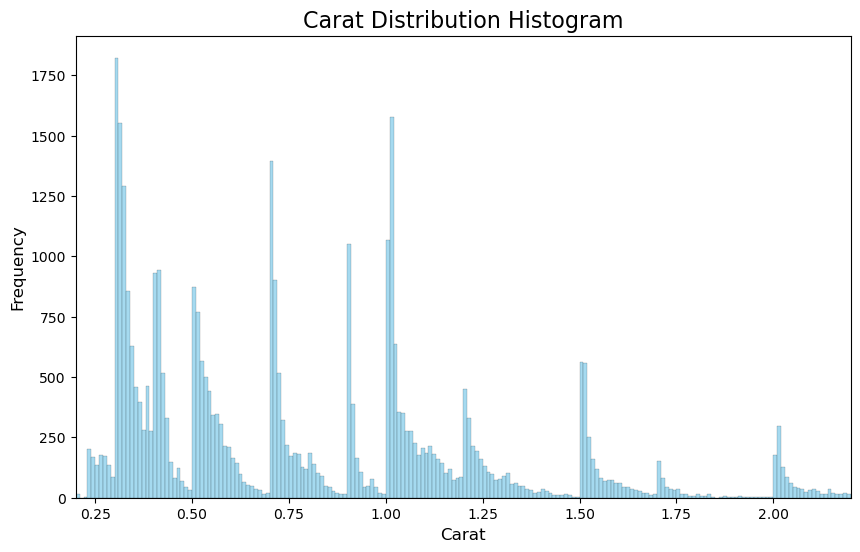

In [48]:
plt.figure(figsize=(10, 6))

# Create the histogram with specified bin width (binwidth = 0.01)
sns.histplot(eda_data['carat'], binwidth=0.01, color="skyblue", edgecolor="black")

# Set x-axis range and labels
plt.xlim(0.2, 2.2)
plt.xlabel('Carat', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add title
plt.title('Carat Distribution Histogram', fontsize=16)

# Remove minor ticks (if any) and show the plot
plt.minorticks_off()
plt.show()

This is interesting, there's a clear non-linear relationship here. Lots of steep fluctuations that will be difficult for linear models to capture. 

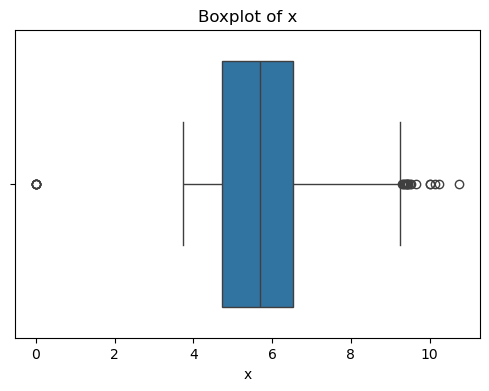

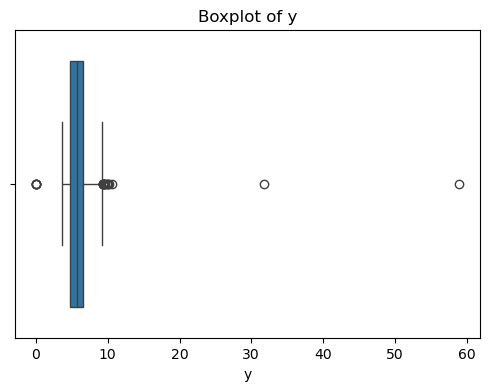

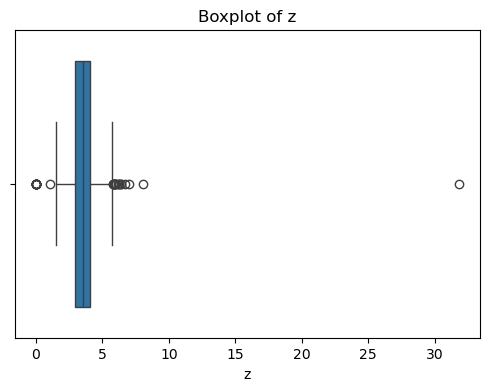

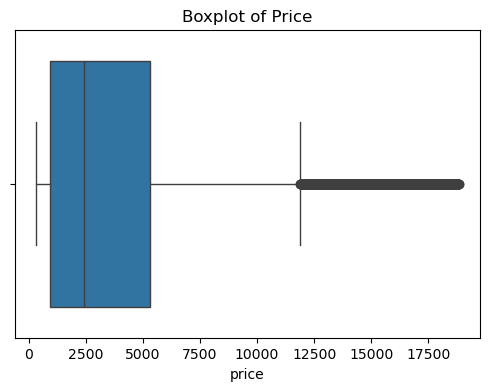

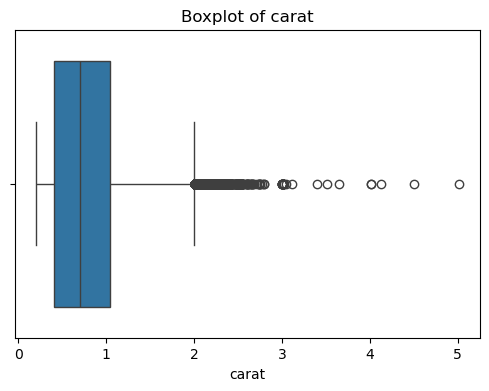

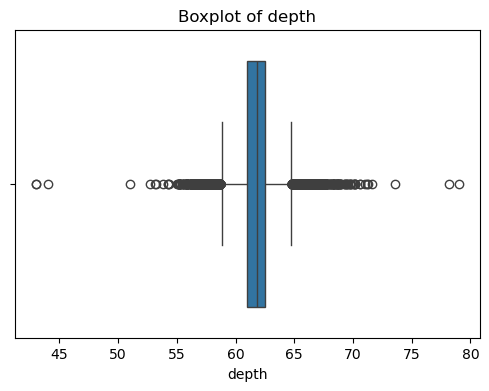

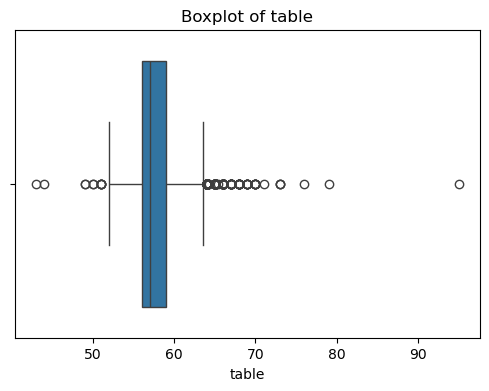

In [18]:
# boxplot to visualise distribution of 'x'
plt.figure(figsize=(6, 4))
sns.boxplot(x=eda_data['x'])
plt.title('Boxplot of x')
plt.show()

# boxplot to visualise distribution of 'y'
plt.figure(figsize=(6, 4))
sns.boxplot(x=eda_data['y'])
plt.title('Boxplot of y')
plt.show()

# boxplot to visualise distribution of 'z'
plt.figure(figsize=(6, 4))
sns.boxplot(x=eda_data['z'])
plt.title('Boxplot of z')
plt.show()

 # boxplot to visualise distribution of 'price'
plt.figure(figsize=(6, 4))
sns.boxplot(x=eda_data['price'])
plt.title('Boxplot of Price')
plt.show()
 # boxplot to visualise distribution of 'carat'
plt.figure(figsize=(6, 4))
sns.boxplot(x=eda_data['carat'])
plt.title('Boxplot of carat')
plt.show()

# boxplot to visualise distribution of 'depth'
plt.figure(figsize=(6, 4))
sns.boxplot(x=eda_data['depth'])
plt.title('Boxplot of depth')
plt.show()

# boxplot to visualise distribution of 'table'
plt.figure(figsize=(6, 4))
sns.boxplot(x=eda_data['table'])
plt.title('Boxplot of table')
plt.show()

Interesting... The x, y and z variables all have "0" as an outlier, this makes sense given that it's not really possible to have a diamond with 0 as a measure of its proportions... x's upper outliers aren't too concerning, however the same annot be said for y and z... There appears to be some cases of extreme outliers with unsually large y and z values. Carat, depth and table have some extreme outliers too... for preprocessing I will need to handle this...

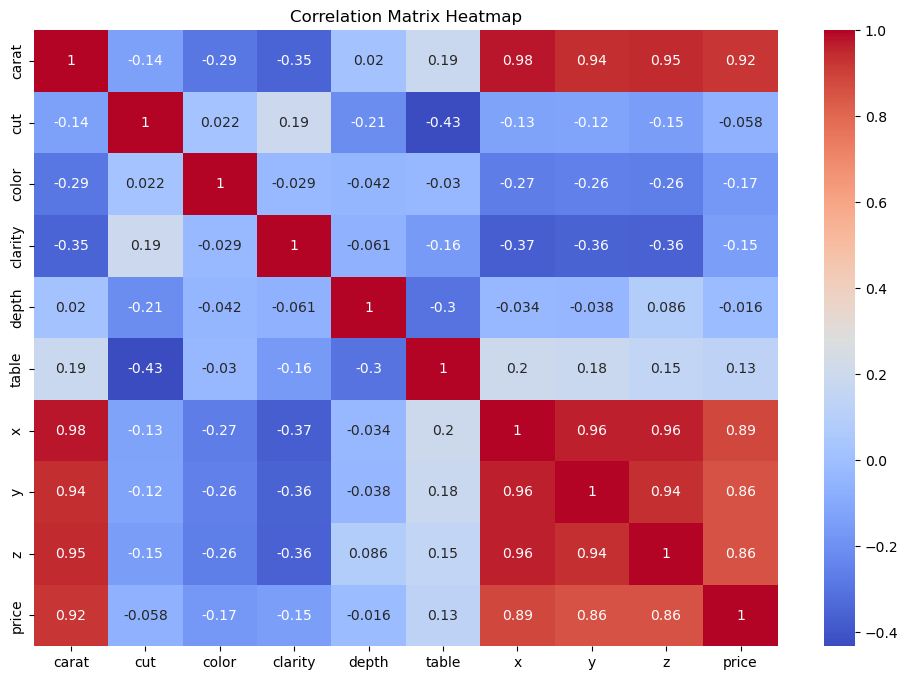

In [19]:
#visualising correlations
corr_matrix = eda_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation matrix shows that x,y and z have a very strong positive correlation with price. However, they also have very high interactions with each other as well as carat... The correlation with carat makes sense given that x, y and z are all measures that relate to the size of a diamond and the greater the values of x,y or z, the greater the value of carat. Multicollinearity weakens the statitical power in regression models because it reduces the precison of coefficients.  I will need to remove these variables in preprocessing. 

source= https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/#:~:text=Multicollinearity%20reduces%20the%20precision%20of,variables%20that%20are%20statistically%20significant. 

In [20]:
#checking to see where the 99th percentile of the numeric variables are
carat_99th_percentile = eda_data['carat'].quantile(0.99)

carat_99th_percentile

2.17

In [21]:
depth_99th_percentile = eda_data['depth'].quantile(0.99)
depth_99th_percentile 

65.5

In [22]:
table_99th_percentile = eda_data['table'].quantile(0.99)
table_99th_percentile 

64.0

In [23]:
x_99th_percentile = eda_data['x'].quantile(0.99)
x_99th_percentile 

8.354300000000002

In [24]:
y_99th_percentile = eda_data['y'].quantile(0.99)
y_99th_percentile 

8.34

In [25]:
z_99th_percentile = eda_data['z'].quantile(0.99)
z_99th_percentile 

5.14

In [26]:
def remove_outliers_iqrr(df, columnn):
    # Calculate 1st and 99th percentiles for the column
    lower_bound = df[columnn].quantile(0.01)
    upper_bound = df[columnn].quantile(0.99)
    
    # Filter the dataframe
    filtered_dff = df[(df[columnn] >= lower_bound) & (df[columnn] <= upper_bound)]
    return filtered_dff

# Copying the data to preserve the original
qnt_99th_dataa = eda_data.copy()

# List of columns of interest for outlier removal
columns_of_interest = [ 'depth', 'table', 'x', 'y', 'z']

# Iteratively remove outliers for each column in the list
for columnn in columns_of_interest:
    qnt_99th_dataa = remove_outliers_iqrr(qnt_99th_dataa, columnn)

# Print shapes of the datasets
print("Original dataset shape:", eda_data.shape)
print("Dataset shape after removing outliers:", qnt_99th_dataa.shape)


Original dataset shape: (37758, 10)
Dataset shape after removing outliers: (34602, 10)


In [27]:
X_train_almost = qnt_99th_dataa.drop(['price'], axis=1)
y_train_final = qnt_99th_dataa['price']

In [28]:
from sklearn.preprocessing import StandardScaler

# List of columns that need to be standardized
numeric_columns = ['carat', 'depth', 'table', 'x', 'y', 'z']

# using linear scaling so that numeric features are standardises to the same scale
scaler = StandardScaler()

# Fit the scaler on the data and transform it
X_train_almost[numeric_columns] = scaler.fit_transform(X_train_almost[numeric_columns])

# Print a preview of the standardized data
print(X_train_almost.head())


          carat  cut  color  clarity     depth    table         x         y  \
36878 -0.850182    5      6        4 -0.048996 -0.64980 -0.873587 -0.862384   
18820  0.642062    5      4        7 -0.048996 -0.64980  0.742763  0.851934   
53406  0.128339    5      6        2  0.279927 -1.13891  0.341124  0.310052   
25954  1.547193    5      4        7 -0.789073 -0.16069  1.487263  1.512045   
13825  0.568673    3      6        4  1.431159 -0.64980  0.664394  0.615476   

              z  
36878 -0.868001  
18820  0.770163  
53406  0.356646  
25954  1.390438  
13825  0.817876  


Now preprocessing the test data

In [39]:
X_test_encoded = X_test.copy()

cut_mapping = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
# note, i wrote the order for color "backwards" to reflect the actual value of colour, rather than alphabetical order 
color_mapping = {"D": 7, "E": 6, "F": 5, "G": 4, "H": 3, "I": 2, "J": 1}
clarity_mapping = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}

# applying the mappings to each col
X_test_encoded['cut'] = X_test_encoded['cut'].map(cut_mapping)
X_test_encoded['color'] = X_test_encoded['color'].map(color_mapping)
X_test_encoded['clarity'] = X_test_encoded['clarity'].map(clarity_mapping)

# showing the first few rows to check the encoding

X_test_encoded.head()

test_data = X_test_encoded.copy()
test_data['price'] = y_test

def remove_outliers_iqrr(df, columnn):
    # gettimg 1st and 99th percentiles for the column
    lower_bound = df[columnn].quantile(0.01)
    upper_bound = df[columnn].quantile(0.99)
    
    filtered_dff = df[(df[columnn] >= lower_bound) & (df[columnn] <= upper_bound)]
    return filtered_dff

# Copying the data to preserve the original
qnt_99th_dataaa = X_test_encoded.copy()
qnt_99th_dataaa['price'] = y_test

columns_of_interest = [ 'depth', 'table', 'x', 'y', 'z']

for columnn in columns_of_interest:
    qnt_99th_dataaa = remove_outliers_iqrr(qnt_99th_dataaa, columnn)

# print shapes of the datasets
print("Original dataset shape:", test_data.shape)
print("Dataset shape after removing outliers:", qnt_99th_dataaa.shape)

X_test_final = qnt_99th_dataaa.drop(['price'], axis=1)
y_test_final = qnt_99th_dataaa['price']
# columns to be standardised
numeric_columns = ['carat', 'depth', 'table', 'x', 'y', 'z']

# using linear scaling so that numeric features are standardises to the same scale

#  transforming without fitting
X_test_final[numeric_columns] = scaler.transform(X_test_final[numeric_columns])

print(X_test_final.head())


Original dataset shape: (16182, 10)
Dataset shape after removing outliers: (14831, 10)
          carat  cut  color  clarity     depth    table         x         y  \
48107 -0.654478    5      4        6 -1.035765 -1.13891 -0.530725 -0.556959   
38948 -1.119275    2      2        5  1.677851 -0.64980 -1.392778 -1.355004   
9301   0.568673    2      6        3  1.760082 -0.16069  0.605618  0.635181   
9206   1.204711    1      2        2  2.500159 -0.16069  1.017052  0.980015   
53638 -1.143738    5      7        3 -0.624611 -0.16069 -1.373186 -1.345152   

              z  
48107 -0.645338  
38948 -1.233805  
9301   0.833781  
9206   1.326820  
53638 -1.408754  


# Modelling

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time
import numpy as np

# defining rse function
def relative_squared_error(y_true, y_pred):
    return np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)

# listing of models
models = [
    ("Linear Regression", LinearRegression()),
    ("K-Neighbors Regression", KNeighborsRegressor()),
    ("Ridge Regression", Ridge()),
    ("Decision Tree Regression", DecisionTreeRegressor()),
    ("Random Forest Regression", RandomForestRegressor()),
    ("Gradient Boosting Regression", GradientBoostingRegressor()),
    ("SGD Regression", SGDRegressor(max_iter=1000, tol=1e-3)),
    ("Support Vector Regression", SVR()),
    ("Linear SVR", LinearSVR(max_iter=10000)),
    ("MLP Regression", MLPRegressor(max_iter=1000))
]

#  an empty list to store the results
results = []

# evaluating each model
for name, model in models:
    start_time = time.time()
    model.fit(X_train_almost, y_train_final)
    y_pred = model.predict(X_test_final)
    end_time = time.time()

    mse = mean_squared_error(y_test_final, y_pred)
    rmse = np.sqrt(mse)
    rse = relative_squared_error(y_test_final, y_pred)
    mae = mean_absolute_error(y_test_final, y_pred)
    execution_time = end_time - start_time
    
    # adding results to the list
    results.append([name, mse, rmse, rse, mae, execution_time])

# storing results in pandas
results_df = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "RSE", "MAE", "Execution Time"])


In [43]:
results_df = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "RSE", "MAE", "Execution Time"])
results_df

,Model,MSE,RMSE,RSE,MAE,Execution Time
0,Linear Regression,1.182288e+06,1087.330509,0.092220,728.043331,0.066622
1,K-Neighbors Regression,3.820266e+05,618.083028,0.029798,342.339599,0.358549
2,Ridge Regression,1.182228e+06,1087.302939,0.092215,728.150456,0.010333
3,Decision Tree Regression,3.952948e+05,628.724772,0.030833,319.542175,0.201888
4,Random Forest Regression,2.224761e+05,471.673751,0.017353,241.315226,11.384362
5,Gradient Boosting Regression,2.735554e+05,523.025285,0.021338,296.845157,2.808245
6,SGD Regression,1.201375e+06,1096.072488,0.093708,723.134507,0.066924
7,Support Vector Regression,5.615857e+06,2369.780023,0.438042,1178.624139,99.622596
8,Linear SVR,1.996745e+06,1413.062448,0.155748,789.663871,0.032184
9,MLP Regression,3.787212e+05,615.403244,0.029541,365.962426,66.846234


In [44]:
pd.options.display.float_format = "{:.2f}".format

# redisplay to 2dp
results_df


,Model,MSE,RMSE,RSE,MAE,Execution Time
0,Linear Regression,1182287.64,1087.33,0.09,728.04,0.07
1,K-Neighbors Regression,382026.63,618.08,0.03,342.34,0.36
2,Ridge Regression,1182227.68,1087.30,0.09,728.15,0.01
3,Decision Tree Regression,395294.84,628.72,0.03,319.54,0.20
4,Random Forest Regression,222476.13,471.67,0.02,241.32,11.38
5,Gradient Boosting Regression,273555.45,523.03,0.02,296.85,2.81
6,SGD Regression,1201374.90,1096.07,0.09,723.13,0.07
7,Support Vector Regression,5615857.36,2369.78,0.44,1178.62,99.62
8,Linear SVR,1996745.48,1413.06,0.16,789.66,0.03
9,MLP Regression,378721.15,615.40,0.03,365.96,66.85
